# Práctica 2 - Segmentación

### Patricia Córdoba Hidalgo

Importamos las librerías que usaremos

In [1]:
import pandas as pd
import numpy as np
from pract2_utils import * 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
datos = pd.read_csv("accidentes_2013.csv", na_values=["?"]) # Leemos los datos del csv

In [3]:
def grafica(data, label, title, xlab, ylab):
    plt.plot(data,label, c='b')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

def graf_barras(data, label, title, xlab, ylab):
    fig, ax = plt.subplots()
    ax.bar(data, label, color='lime')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

## Escenario 1: Choque frontal en carretera convencional 

### Selección de datos

Estudiaremos los datos que representen choques frontales en carreteras convencionales. 

In [4]:
# Seleccionamos los datos con los que trabajaremos
caso1 = datos[datos.TIPO_VIA == 'VÍA CONVENCIONAL']
caso1 = caso1[caso1.TIPO_ACCIDENTE == 'Colisión de vehículos en marcha (Frontal)']
caso1.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
75,4,19.0,4,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,MOJADA,CREPÚSCULO,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
132,12,21.0,7,Girona,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,SEÑAL DE STOP,MOJADA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
139,5,15.0,5,Girona,Cataluña,NO_ES_ISLA,1,1,0,0.0,...,NaN,MOJADA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
146,12,3.0,7,Lleida,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,NaN,SECA Y LIMPIA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,DESLUMBRAMIENTO,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
150,3,15.0,6,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN


In [5]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [6]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso1 = caso1[atributos]
caso1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 75 to 88793
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1448 non-null   int64
 1   TOT_MUERTOS               1448 non-null   int64
 2   TOT_HERIDOS_GRAVES        1448 non-null   int64
 3   TOT_HERIDOS_LEVES         1448 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1448 non-null   int64
dtypes: int64(5)
memory usage: 67.9 KB


### Normalización de los datos

In [7]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso1_norm = scaler.fit_transform(caso1)
caso1_norm[:5]

array([[0.06666667, 0.        , 0.        , 0.14285714, 0.2       ],
       [0.13333333, 0.        , 0.        , 0.21428571, 0.2       ],
       [0.        , 0.        , 0.        , 0.07142857, 0.2       ],
       [0.13333333, 0.        , 0.4       , 0.07142857, 0.2       ],
       [0.06666667, 0.        , 0.        , 0.14285714, 0.2       ]])

### Algoritmos de clustering

#### K-Means

Seleccionamos el número de clusters a usar.

In [8]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

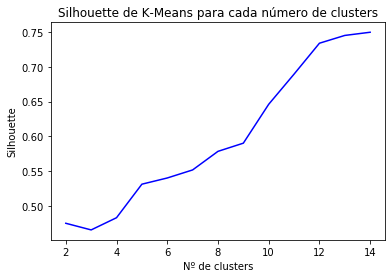

In [9]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

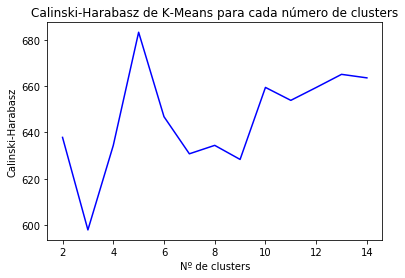

In [10]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [11]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.47551510521831664, 0.4659996963306395, 0.4834890867333391, 0.5315690552295911, 0.5404576589330076, 0.551998690980355, 0.5786471085948179, 0.5903779353773023, 0.6461326222918197, 0.6893747693555886, 0.7336714808160644, 0.7448415168530551, 0.749410469848095]

Calinski-Harabasz: 
[637.8831140088855, 597.9798532808658, 634.4016355078425, 683.2263367508311, 646.8004817570682, 630.8036708742871, 634.4445453990445, 628.3756258948337, 659.4342926638305, 653.852874658656, 659.3965542394021, 665.0690582901761, 663.5502144820157]


Elegimos usar 5 clusters.

[0.5124309392265194, 0.08080110497237569, 0.18646408839779005, 0.07527624309392265, 0.14502762430939226]


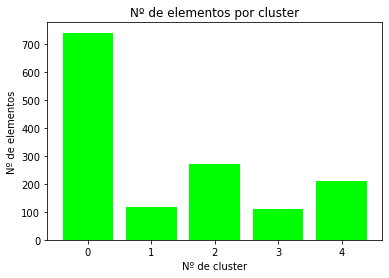

In [12]:
results5 = KMeans(n_clusters=5, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(5)]

for i in range(len(caso1_norm)):
    m[results5.labels_[i]]+=1
    
graf_barras(range(5), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
print([m[i]/len(caso1) for i in range(len(m))])

In [13]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results5.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.531569
calinsky: 683.226337


Visualizamos los centroides.

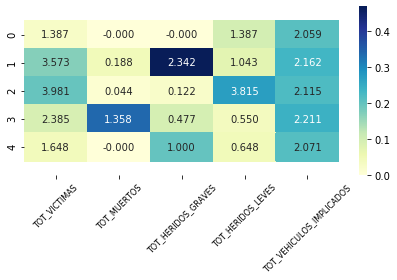

In [14]:
centroids = results5.cluster_centers_
visualize_centroids(centroids, np.array(caso1), atributos)

Visualizamos otras gráficas

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


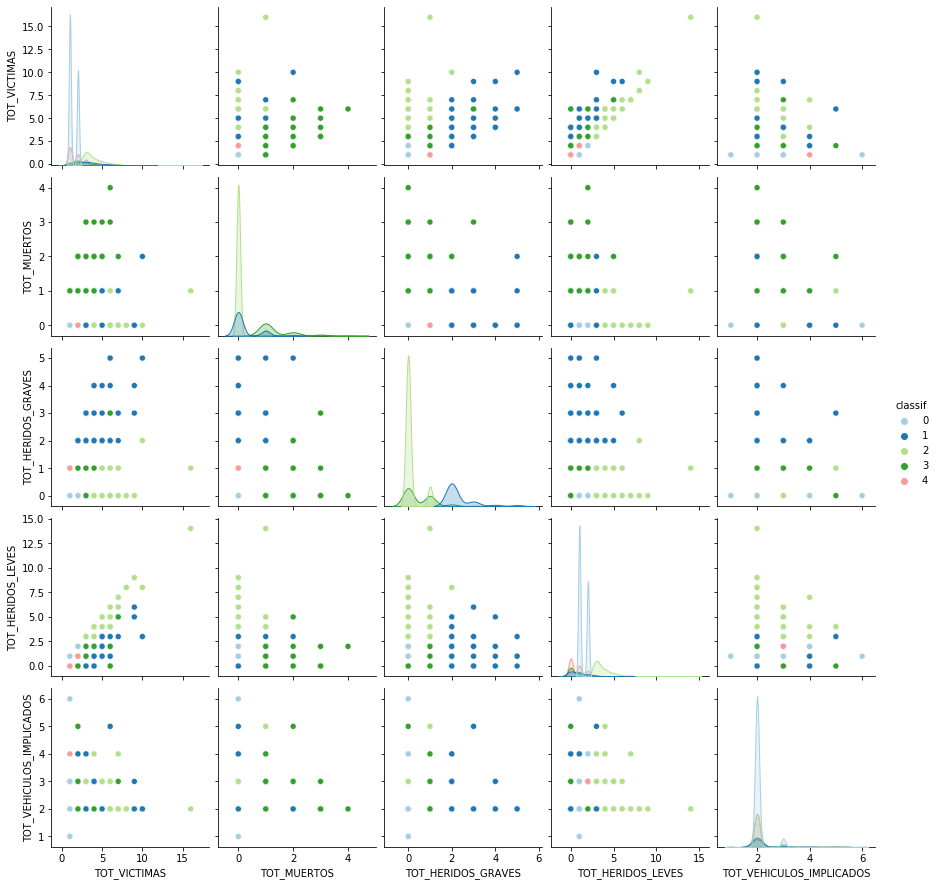

In [15]:
 pairplot(caso1, atributos, results5.labels_)

Visualizamos los diagramas de cajas:

In [16]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso1.copy()
datos_bp['Cluster'] = results5.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,2
139,1,0,0,1,2,0
146,3,0,2,1,2,1
150,2,0,0,2,2,0


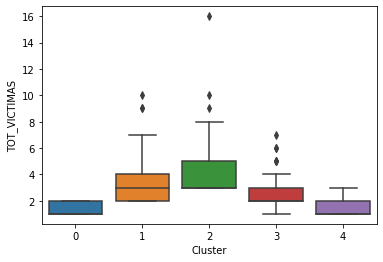

In [17]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

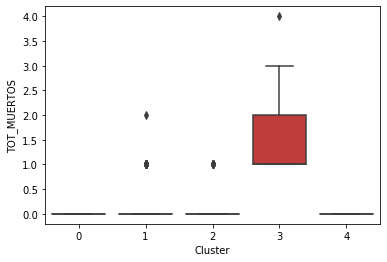

In [18]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

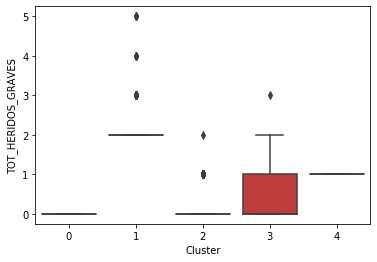

In [19]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

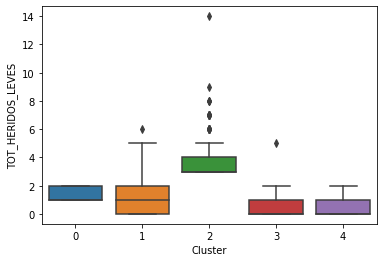

In [20]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

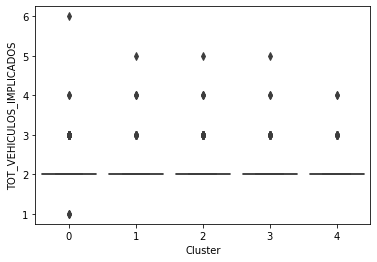

In [21]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

#### DBSCAN

Seleccionamos los parámetros a usar.

In [22]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=10).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

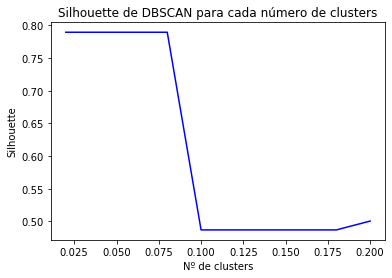

In [23]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

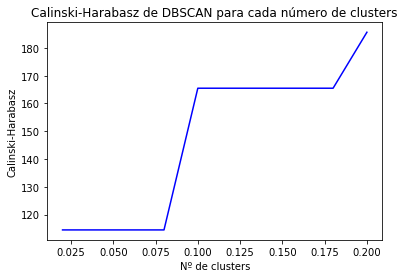

In [24]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [25]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.7895289623335725, 0.7895289623335725, 0.7895289623335725, 0.7895289623335725, 0.4869805568764862, 0.4869805568764862, 0.4869805568764862, 0.4869805568764862, 0.4869805568764863, 0.5005453962094687]

Calinski-Harabasz: 
[114.4553269039885, 114.4553269039885, 114.4553269039885, 114.4553269039885, 165.50098317272966, 165.50098317272966, 165.50098317272966, 165.50098317272966, 165.50098317272966, 185.66574970475563]


Elegimos eps=0.08.

[198, 264, 130, 433, 18, 106, 11, 60, 43, 29, 20, 31, 21, 15, 21, 19, 11, 18]

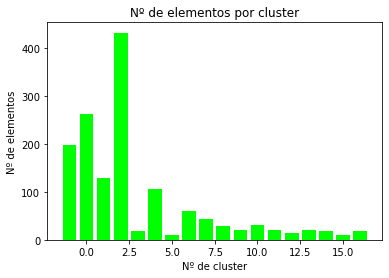

In [26]:
results08 = DBSCAN(eps=0.08, min_samples=10).fit(caso1_norm)
n = len(np.unique(results08.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso1_norm)):
    if results08.labels_[i]!=-1:
        m[results08.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[100, 908, 65, 221, 41, 25, 51, 11, 14, 12]

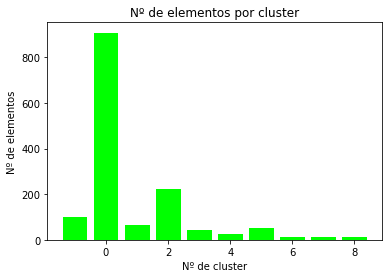

In [27]:
results01 = DBSCAN(eps=0.1, min_samples=10).fit(caso1_norm)
n = len(np.unique(results01.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso1_norm)):
    if results01.labels_[i]!=-1:
        m[results01.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [28]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results01.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.486981
calinsky: 165.500983


Visualizamos los centroides.

In [29]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso1.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results01.labels_
datos_cen.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,0
139,1,0,0,1,2,0
146,3,0,2,1,2,1
150,2,0,0,2,2,0


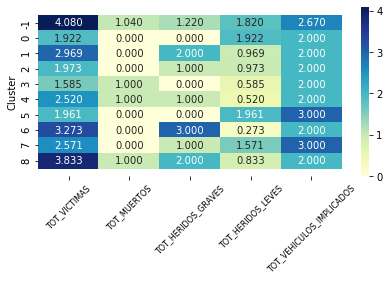

In [30]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids_dbscan(centroids, np.array(caso1), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

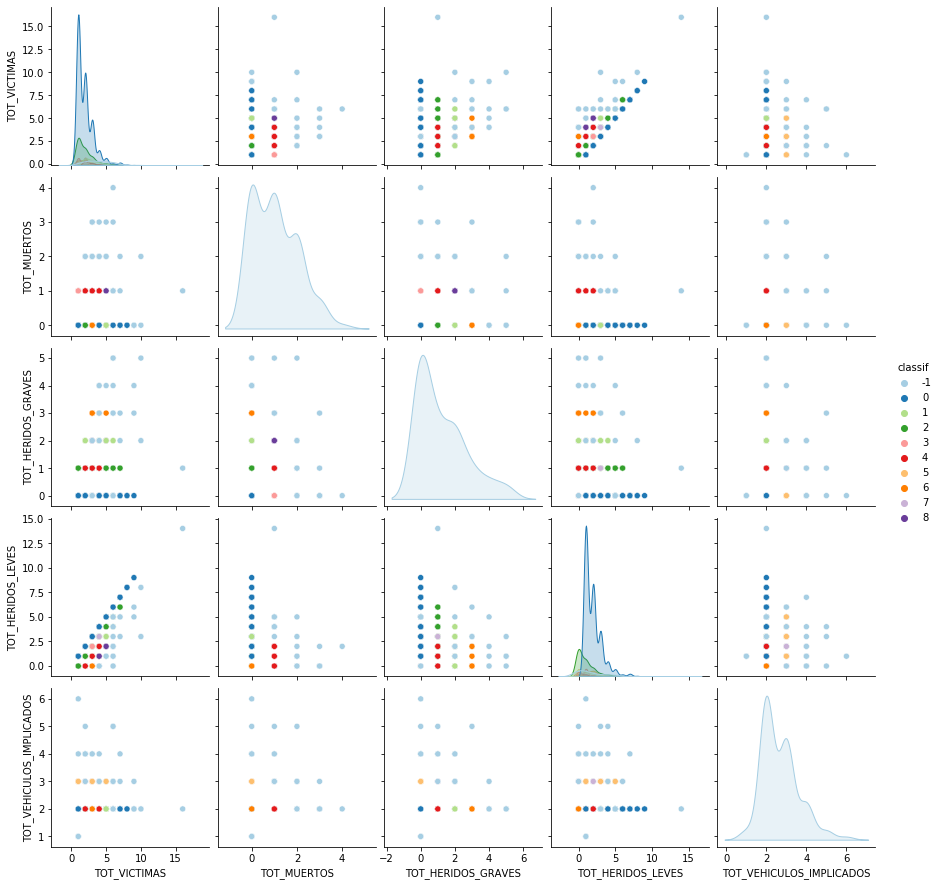

In [31]:
pairplot(caso1, atributos, results01.labels_)

In [32]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso1)
datos_bp['Cluster'] = results01.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
75,2,0,0,2,2,0
132,3,0,0,3,2,0
139,1,0,0,1,2,0
146,3,0,2,1,2,1
150,2,0,0,2,2,0


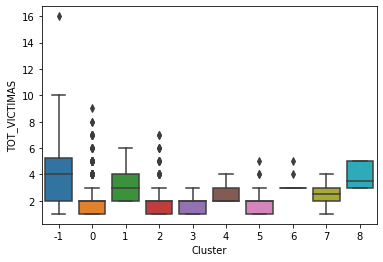

In [33]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

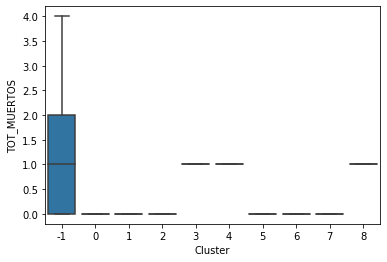

In [34]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

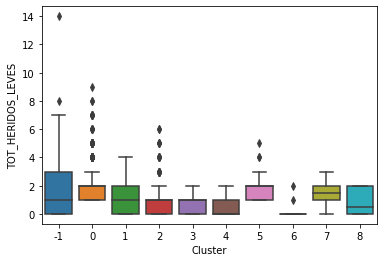

In [35]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

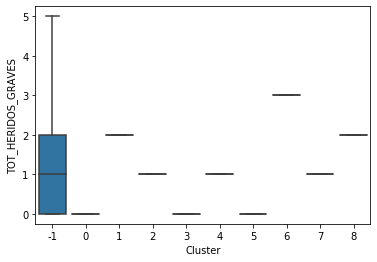

In [36]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

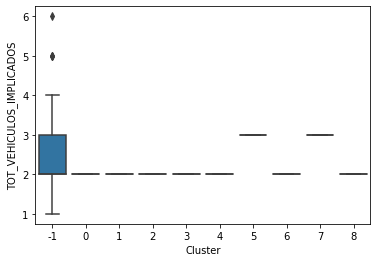

In [37]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

## Escenario 2: Fin de semana con densidad de circulación densa

### Visualización de datos

In [38]:
datos['DIASEMANA'] = datos['DIASEMANA'].astype(str)
print(Counter(datos['DIASEMANA']))

Counter({'5': 14614, '2': 13527, '4': 13469, '3': 13343, '1': 13185, '6': 11410, '7': 9971})


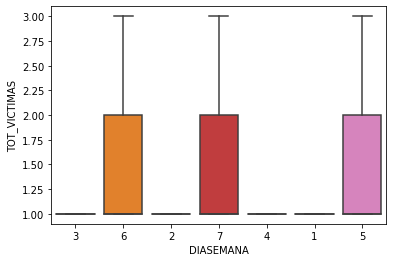

In [39]:
sns.boxplot(data=datos, x='DIASEMANA', y='TOT_VICTIMAS', showfliers = False)

In [40]:
datos['DIASEMANA'] = datos['DIASEMANA'].astype(int)

### Selección de datos

Estudiaremos los datos que representen accidentes de viernes a domingo.

In [41]:
# Seleccionamos los datos con los que trabajaremos
caso2 = datos[(datos.DIASEMANA == 6) | (datos.DIASEMANA == 7) | (datos.DIASEMANA == 5)]
caso2 = caso2[caso2.DENSIDAD_CIRCULACION == 'DENSA']

In [42]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [43]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso2 = caso2[atributos]
caso2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 1 to 89472
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1383 non-null   int64
 1   TOT_MUERTOS               1383 non-null   int64
 2   TOT_HERIDOS_GRAVES        1383 non-null   int64
 3   TOT_HERIDOS_LEVES         1383 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1383 non-null   int64
dtypes: int64(5)
memory usage: 64.8 KB


### Normalización de los datos

In [44]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso2_norm = scaler.fit_transform(caso2)
caso2_norm[:5]

array([[0.   , 0.   , 0.   , 0.1  , 0.25 ],
       [0.   , 0.   , 0.   , 0.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 0.   ],
       [0.   , 0.   , 0.   , 0.1  , 0.375],
       [0.   , 0.   , 0.   , 0.1  , 0.125]])

### Algoritmos de clustering

#### K-Means

Seleccionamos los parámetros a usar.

In [45]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

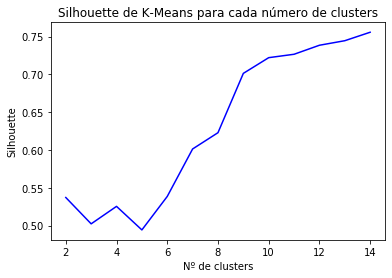

In [46]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

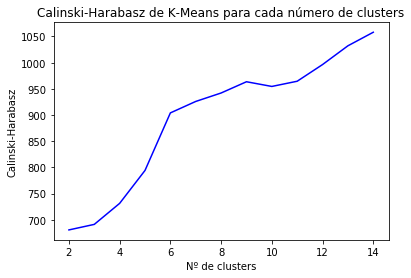

In [47]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [48]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.5370884902834916, 0.5022253639905712, 0.5253455054070136, 0.4941822307189281, 0.5384826599151725, 0.601310808513732, 0.6228592681964149, 0.7013609213343277, 0.7221502954295131, 0.7266476702162132, 0.7385815169799498, 0.7445925945766767, 0.755793883799247]

Calinski-Harabasz: 
[680.6474578600636, 691.2087946486065, 731.3590806547992, 794.2278720981091, 904.0949725499044, 925.9700253681594, 942.1012174830314, 963.5793862878563, 954.6141788919715, 964.5578901852715, 996.4201247190041, 1032.2367917798642, 1058.1110463372995]


Elegimos usar 9 clusters.

[135, 141, 415, 17, 48, 129, 240, 75, 183]

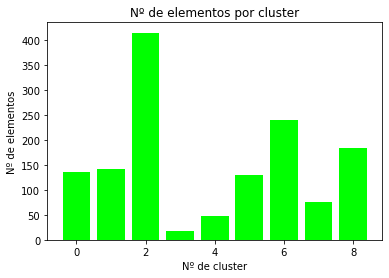

In [49]:
results9 = KMeans(n_clusters=9, random_state=0).fit(caso2_norm)

# Número de elementos por cluster
m = [0 for i in range(9)]

for i in range(len(caso2)):
    m[results9.labels_[i]]+=1
    
graf_barras(range(9), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [50]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results9.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.701361
calinsky: 963.579386


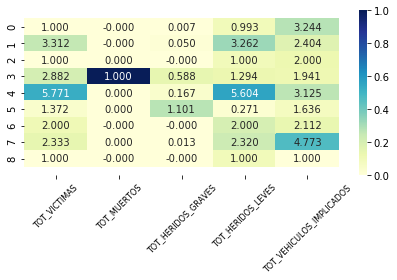

In [51]:
centroids = results9.cluster_centers_
visualize_centroids(centroids, np.array(caso2), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

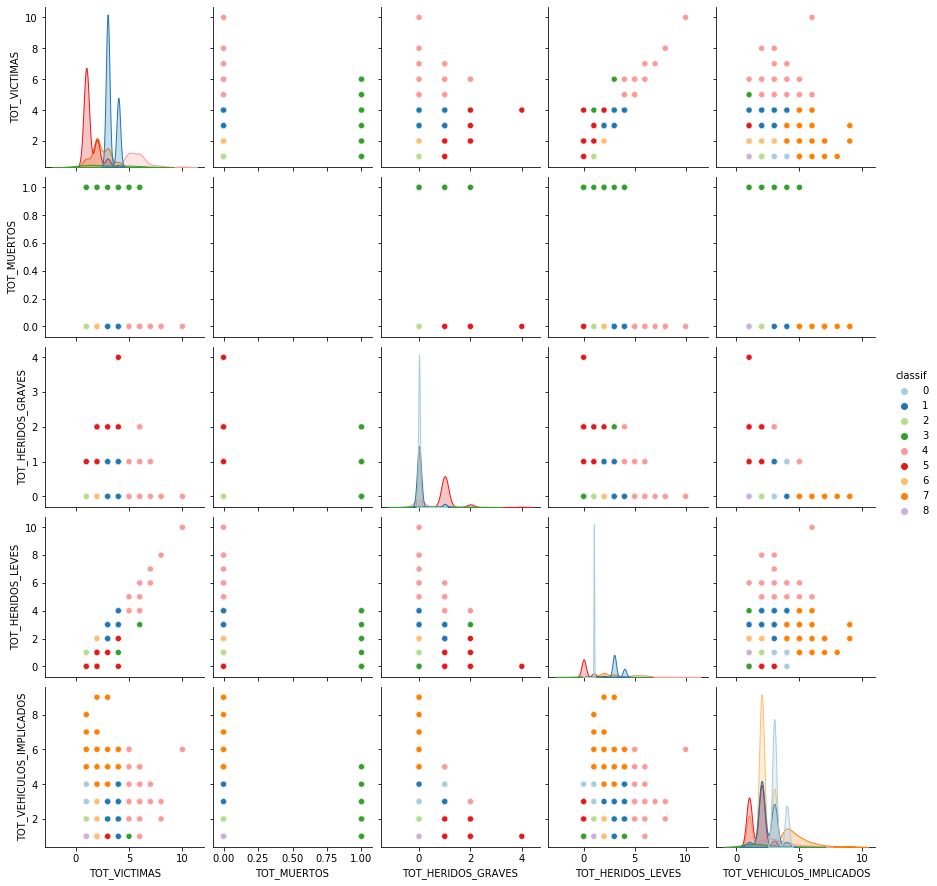

In [52]:
 pairplot(caso2, atributos, results9.labels_)

In [53]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso2.copy()
datos_bp['Cluster'] = results9.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
1,1,0,0,1,3,0
126,1,0,0,1,1,8
194,1,0,0,1,1,8
210,1,0,0,1,4,0
609,1,0,0,1,2,2


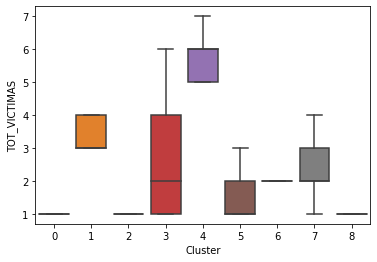

In [54]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

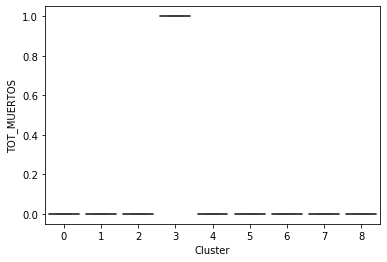

In [55]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

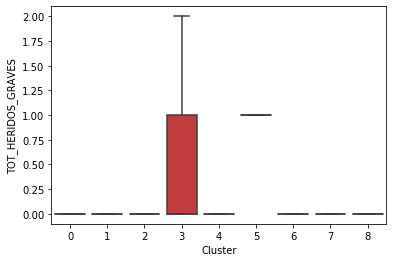

In [56]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

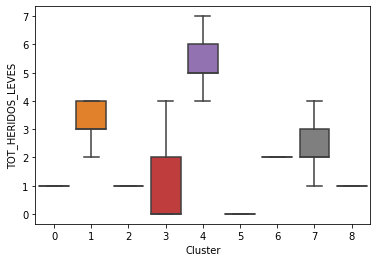

In [57]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

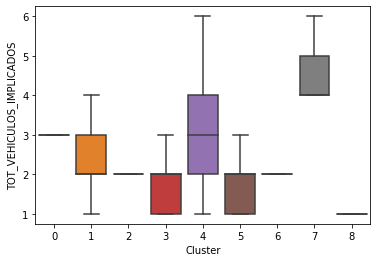

In [58]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster', showfliers = False)

#### DBSCAN

Seleccionamos los parámetros a usar.

In [59]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=10).fit(caso2_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

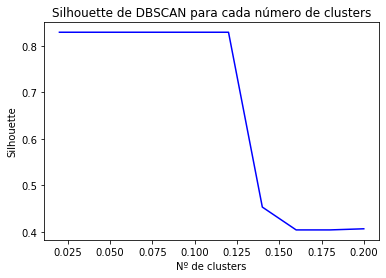

In [60]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

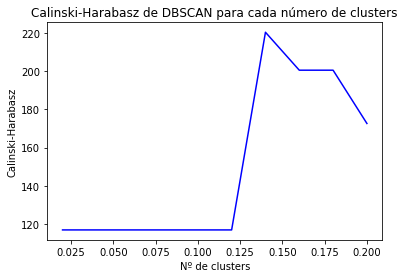

In [61]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [62]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.8289225455695599, 0.82892254556956, 0.82892254556956, 0.82892254556956, 0.82892254556956, 0.82892254556956, 0.4536119566421056, 0.40459512637907297, 0.4045951263790732, 0.407010695661426]

Calinski-Harabasz: 
[116.97236922937577, 116.97236922937577, 116.97236922937577, 116.97236922937577, 116.97236922937577, 116.97236922937577, 220.24625024938823, 200.4202941262233, 200.4202941262233, 172.58676418042137]


Elegimos eps=0.14.

[61, 740, 19, 94, 273, 17, 117, 44, 18]

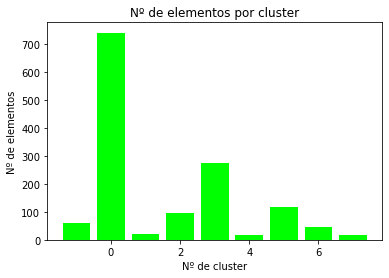

In [63]:
results = DBSCAN(eps=0.14, min_samples=10).fit(caso2_norm)
n = len(np.unique(results.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso2_norm)):
    if results.labels_[i]!=-1:
        m[results.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [64]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso2_norm, results.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.453612
calinsky: 220.246250


Visualizamos los centroides.

In [65]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso2.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results.labels_
datos_cen.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
1,1,0,0,1,3,0
126,1,0,0,1,1,0
194,1,0,0,1,1,0
210,1,0,0,1,4,0
609,1,0,0,1,2,0


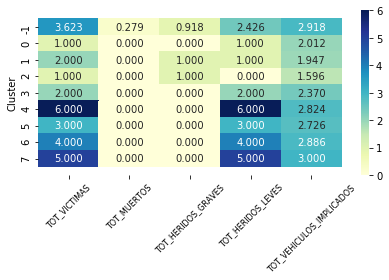

In [66]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids_dbscan(centroids, np.array(caso2), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

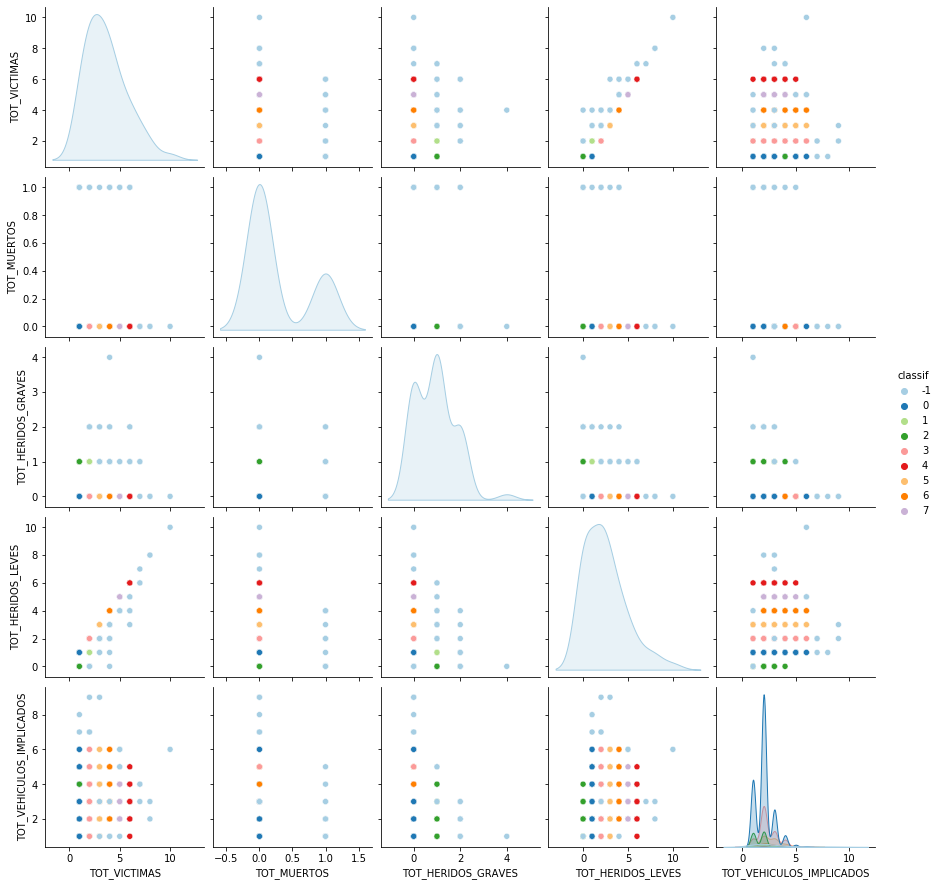

In [67]:
pairplot(caso2, atributos, results.labels_)

In [68]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso2)
datos_bp['Cluster'] = results.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
1,1,0,0,1,3,0
126,1,0,0,1,1,0
194,1,0,0,1,1,0
210,1,0,0,1,4,0
609,1,0,0,1,2,0


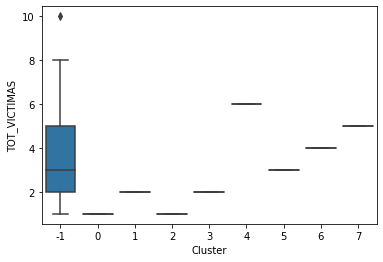

In [69]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster')

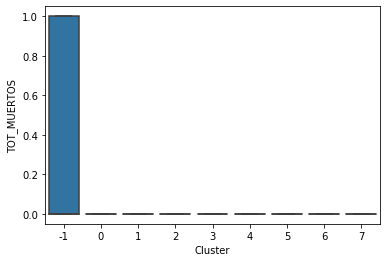

In [70]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster')

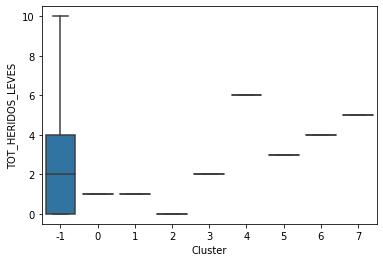

In [71]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster')

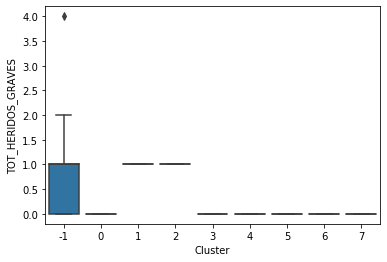

In [72]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster')

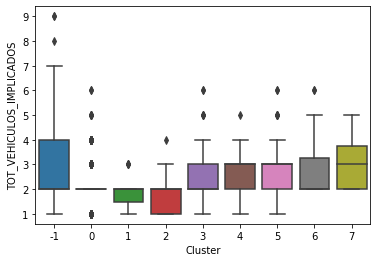

In [73]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster')

## Escenario 3: Entre semana con densidad de circulación densa

### Selección de datos

In [74]:
# Seleccionamos los datos con los que trabajaremos
caso3 = datos[(datos.DIASEMANA == 1) | (datos.DIASEMANA == 2) | (datos.DIASEMANA == 3) | (datos.DIASEMANA == 4)]
caso3 = caso3[caso3.DENSIDAD_CIRCULACION == 'DENSA']

In [75]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [76]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso3 = caso3[atributos]
caso3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 13 to 89517
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              2600 non-null   int64
 1   TOT_MUERTOS               2600 non-null   int64
 2   TOT_HERIDOS_GRAVES        2600 non-null   int64
 3   TOT_HERIDOS_LEVES         2600 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  2600 non-null   int64
dtypes: int64(5)
memory usage: 121.9 KB


### Normalización de datos

In [77]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso3_norm = scaler.fit_transform(caso3)
caso3_norm[:5]

array([[0.        , 0.        , 0.        , 0.07142857, 0.03448276],
       [0.        , 0.        , 0.        , 0.07142857, 0.03448276],
       [0.        , 0.        , 0.        , 0.07142857, 0.06896552],
       [0.        , 0.        , 0.        , 0.07142857, 0.03448276],
       [0.07142857, 0.        , 0.        , 0.14285714, 0.10344828]])

### Algoritmos de clústering

#### K-means

Seleccionamos los parámetros a usar.

In [78]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso3_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

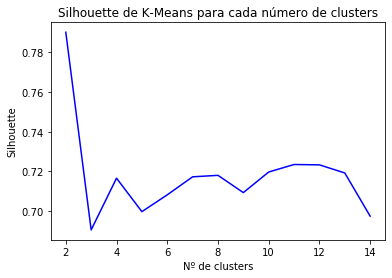

In [79]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

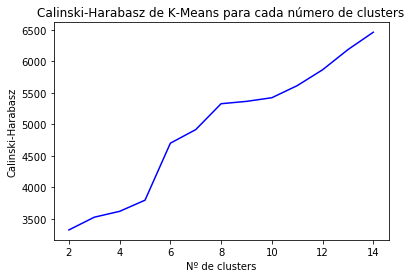

In [80]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [81]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.7901017312445585, 0.6905258174794838, 0.7165882158328284, 0.6997302171607822, 0.7081949623134673, 0.7172739598299913, 0.7180182979610457, 0.7093267907202336, 0.7196928899841788, 0.7234741493620663, 0.7232982041710023, 0.7192164530386996, 0.6974543104655525]

Calinski-Harabasz: 
[3323.5016323001405, 3525.6287793192128, 3618.7158935218295, 3795.7422278443883, 4701.551455912414, 4917.0751184922265, 5328.482755105567, 5365.788661855421, 5423.525859490967, 5615.469394789773, 5867.24077956305, 6188.017509532395, 6464.06705569186]


[1993, 233, 342, 32]

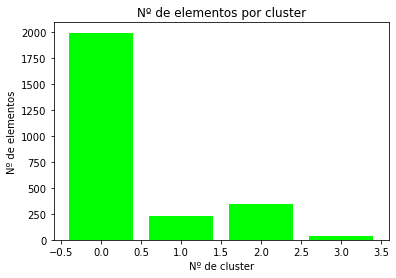

In [82]:
results4 = KMeans(n_clusters=4, random_state=0).fit(caso3_norm)

# Número de elementos por cluster
m = [0 for i in range(4)]

for i in range(len(caso3_norm)):
    m[results4.labels_[i]]+=1
    
graf_barras(range(4), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[1482, 211, 275, 32, 22, 511, 66, 1]

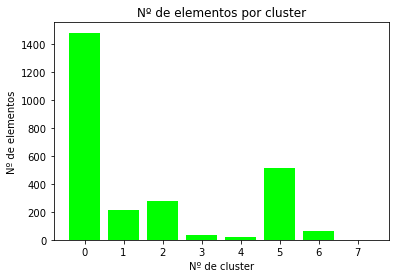

In [83]:
results8 = KMeans(n_clusters=8, random_state=0).fit(caso3_norm)

# Número de elementos por cluster
m = [0 for i in range(8)]

for i in range(len(caso3)):
    m[results8.labels_[i]]+=1
    
graf_barras(range(8), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

[1482, 159, 191, 15, 1, 29, 511, 30, 120, 7, 52, 3]

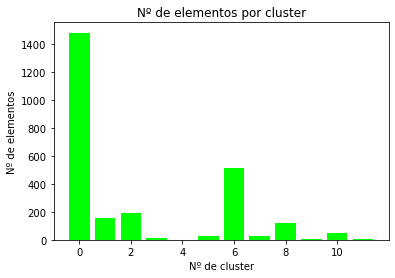

In [84]:
results12 = KMeans(n_clusters=12, random_state=0).fit(caso3_norm)

# Número de elementos por cluster
m = [0 for i in range(12)]

for i in range(len(caso3)):
    m[results12.labels_[i]]+=1
    
graf_barras(range(12), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

Elegimos 4 clústers.

In [85]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results4.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.716588
calinsky: 3618.715894


Visualizamos los centroides.

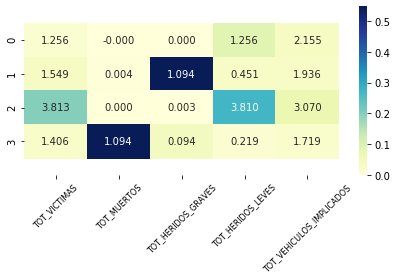

In [86]:
centroids = results4.cluster_centers_
visualize_centroids(centroids, np.array(caso3), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


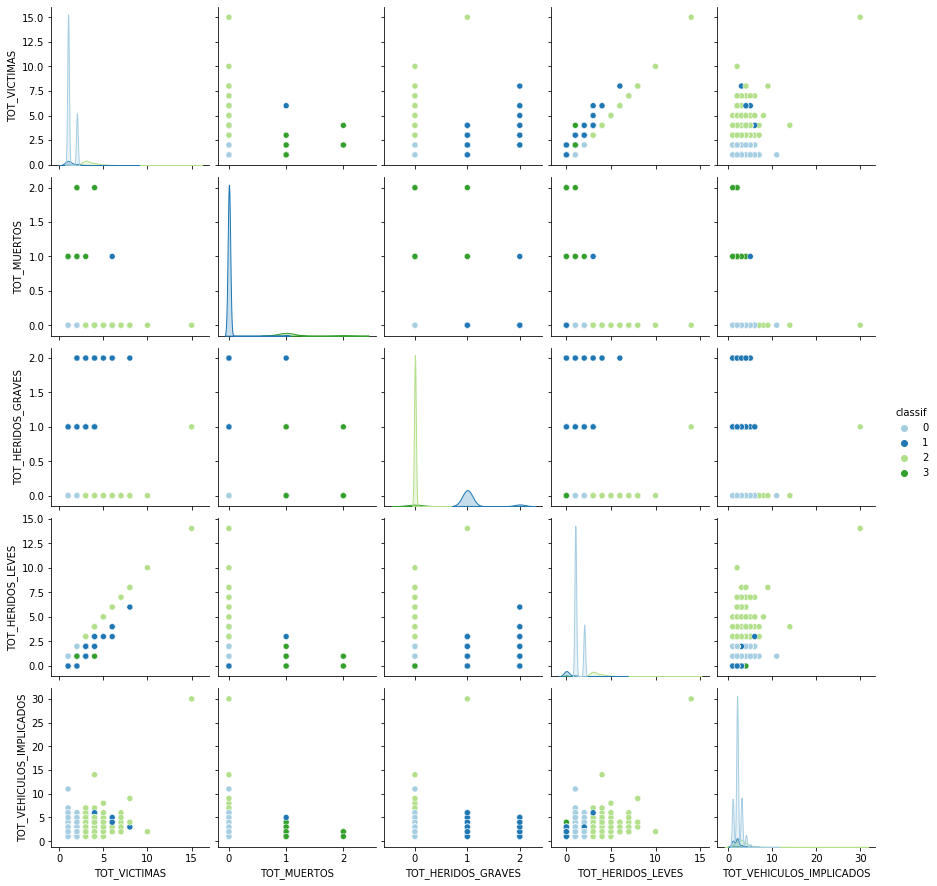

In [87]:
pairplot(caso3, atributos, results4.labels_)

In [88]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = caso3.copy()
datos_bp['Cluster'] = results4.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
13,1,0,0,1,2,0
23,1,0,0,1,2,0
48,1,0,0,1,3,0
367,1,0,0,1,2,0
481,2,0,0,2,4,0


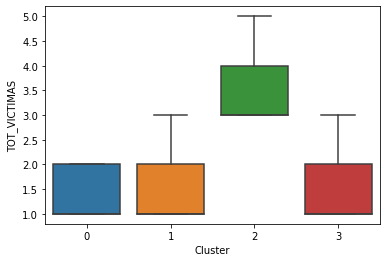

In [89]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

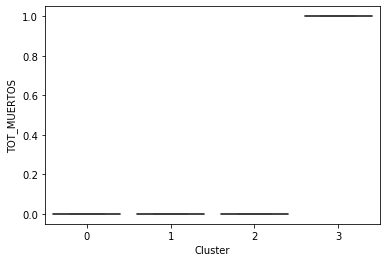

In [90]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

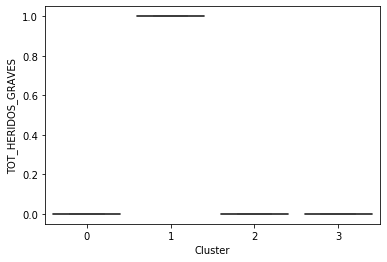

In [91]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

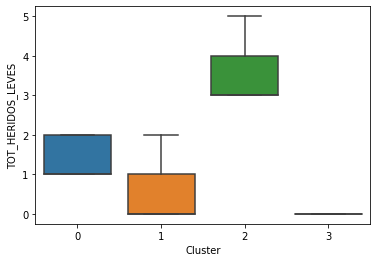

In [92]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

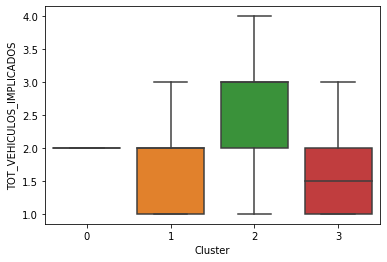

In [93]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster',showfliers = False)

#### DBSCAN

Seleccionamos los parámetros a usar.

In [94]:
# Vectores con los valores de las métricas
s = []
c = []

for i in np.linspace(0.02, 0.2, num=10):
    results = DBSCAN(eps=i, min_samples=10).fit(caso3_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

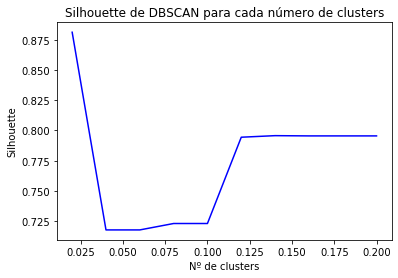

In [95]:
grafica(np.linspace(0.02, 0.2, num=10), s, 'Silhouette de DBSCAN para cada número de clusters', 'Nº de clusters', 'Silhouette')

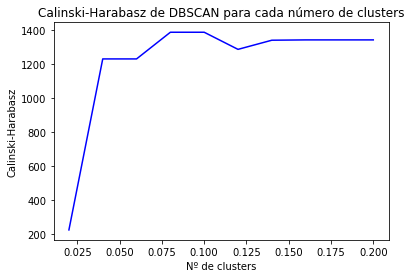

In [96]:
grafica(np.linspace(0.02, 0.2, num=10), c, 'Calinski-Harabasz de DBSCAN para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [97]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.8813554395557858, 0.717645527812345, 0.717645527812345, 0.7229551894566059, 0.7229551894566059, 0.7944150822377709, 0.7957146553352213, 0.7955070215626333, 0.7955070215626333, 0.7955070215626333]

Calinski-Harabasz: 
[222.44145602974191, 1230.4090960667304, 1230.4090960667304, 1387.6592433383134, 1387.6592433383134, 1286.7594060038498, 1340.657424226088, 1342.5476210406275, 1342.5476210406275, 1342.5476210406275]


Elegimos eps=0.14, ya que en él aumenta Silhouette y Clalinski

[14, 2331, 211, 27, 17]

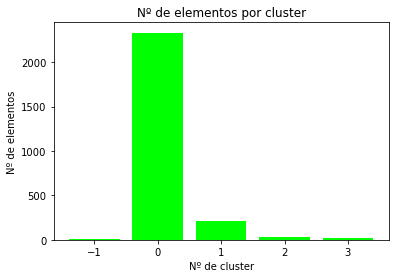

In [98]:
results = DBSCAN(eps=0.14, min_samples=10).fit(caso3_norm)
n = len(np.unique(results.labels_))

# Número de elementos por cluster
m = [0 for i in range(n)]

for i in range(len(caso3_norm)):
    if results.labels_[i]!=-1:
        m[results.labels_[i]+1]+=1
    else:
        m[0]+=1
        
graf_barras(range(-1,n-1), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")
m

In [99]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso3_norm, results.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.795715
calinsky: 1340.657424


Visualizamos los centroides.

In [100]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_cen = caso3.copy()
datos_cen.columns = atributos
datos_cen['Cluster'] = results.labels_
datos_cen.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
13,1,0,0,1,2,0
23,1,0,0,1,2,0
48,1,0,0,1,3,0
367,1,0,0,1,2,0
481,2,0,0,2,4,0


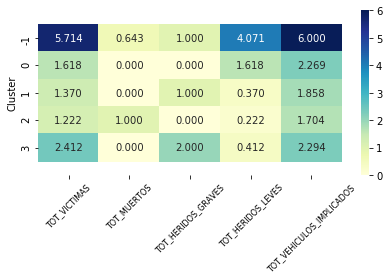

In [101]:
centroids = datos_cen.groupby('Cluster').mean()
visualize_centroids_dbscan(centroids, np.array(caso3), atributos)

/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

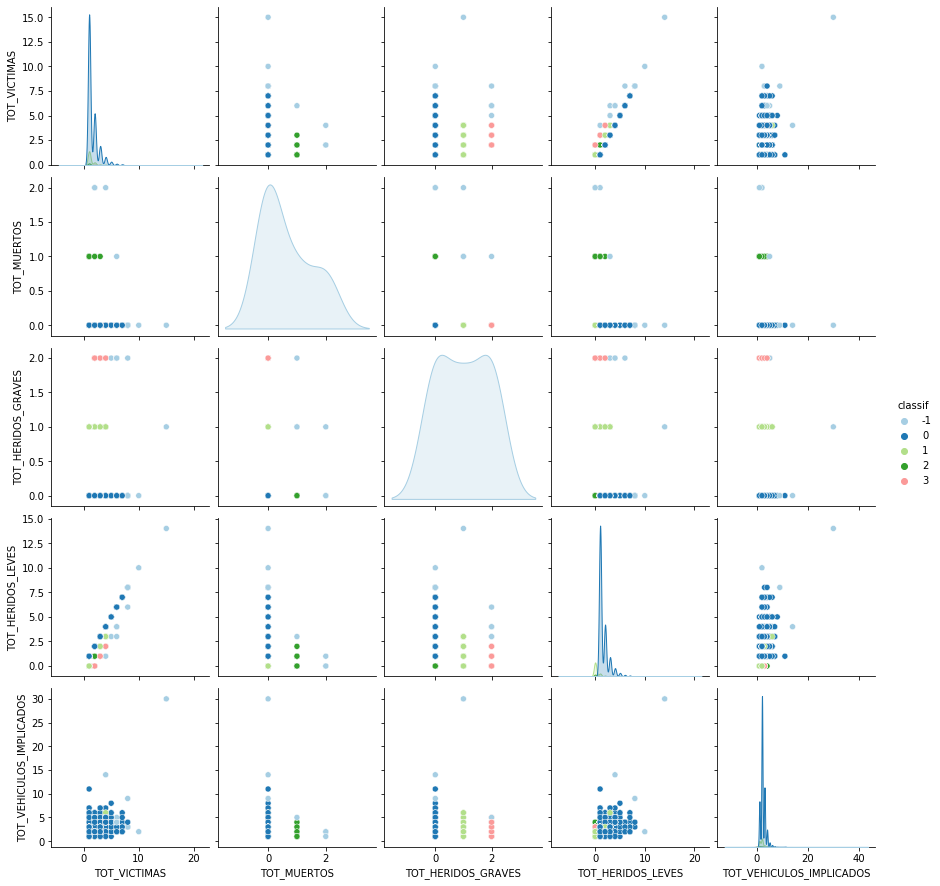

In [102]:
pairplot(caso3, atributos, results.labels_)

In [103]:
# Creamos una estructura con los datos y el cluster al que pertenece cada instancia
datos_bp = pd.DataFrame(caso3)
datos_bp['Cluster'] = results.labels_
datos_bp.head()

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,Cluster
13,1,0,0,1,2,0
23,1,0,0,1,2,0
48,1,0,0,1,3,0
367,1,0,0,1,2,0
481,2,0,0,2,4,0


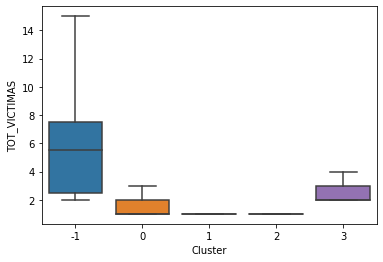

In [104]:
sns.boxplot(data=datos_bp, y='TOT_VICTIMAS', x='Cluster', showfliers = False)

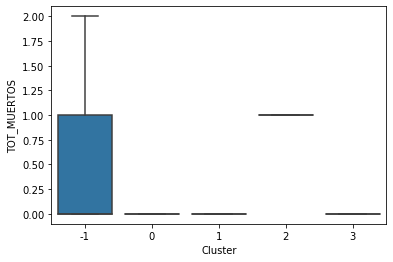

In [105]:
sns.boxplot(data=datos_bp, y='TOT_MUERTOS', x='Cluster', showfliers = False)

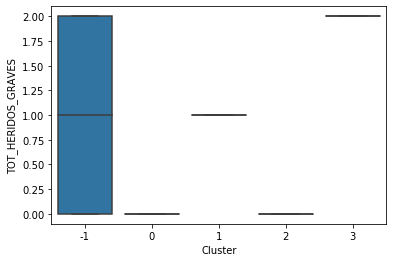

In [106]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_GRAVES', x='Cluster', showfliers = False)

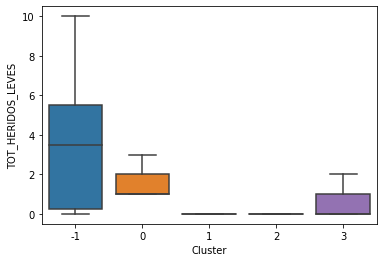

In [107]:
sns.boxplot(data=datos_bp, y='TOT_HERIDOS_LEVES', x='Cluster', showfliers = False)

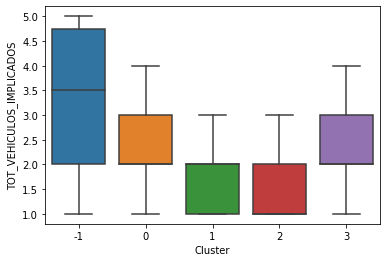

In [108]:
sns.boxplot(data=datos_bp, y='TOT_VEHICULOS_IMPLICADOS', x='Cluster', showfliers = False)